In [1]:
import torch
import torch.nn
import torchvision.transforms as transforms

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from models.deepcrack_networks import define_deepcrack

In [4]:
#--- build the model ---#
crack_model = define_deepcrack(
    in_nc = 3,
    num_classes = 1,
    ngf = 64
).eval()

#--- download the pretrained model and copy to the "./pretrained_models" folder ---#
state_dict = torch.load("./pretrained_models/pretrained_net_G.pth")
crack_model.load_state_dict(state_dict)

initialize network with xavier


<All keys matched successfully>

torch.Size([1, 3, 1024, 1360])


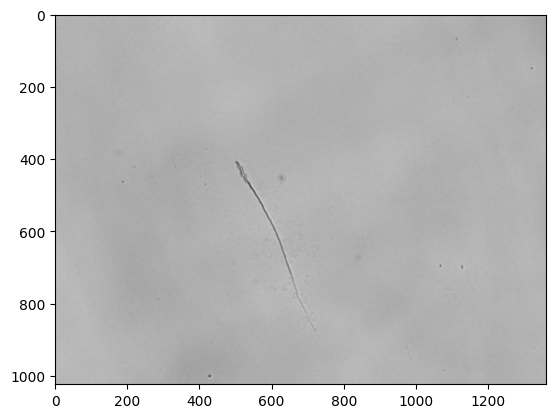

In [2]:
#--- load a test image ---#
test_img = Image.open("C:\\Users\\sonic\\OneDrive\\Documents\\DeepSegmentor\\datasets\\DeepCrack\\test_img\\images_CMR22B_001_2.jpg").convert("RGB")
plt.imshow(np.array(test_img))

#--- transform to torch.Tensor type ---#
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))])
test_img = transform(test_img).unsqueeze(0)
print(test_img.shape)

In [6]:
#--- inference and convert the prediction value between 0 and 1 by sigmoid function -
with torch.no_grad():
    pred = crack_model(test_img)[-1]

pred = torch.sigmoid(pred)
print(pred.shape)

print(torch.max(pred), torch.min(pred))

torch.Size([1, 1, 1024, 1360])
tensor(0.8252) tensor(0.0001)


In [7]:
pred = (pred.squeeze().numpy() * 255).astype("uint8")
print(pred.shape)

(1024, 1360)


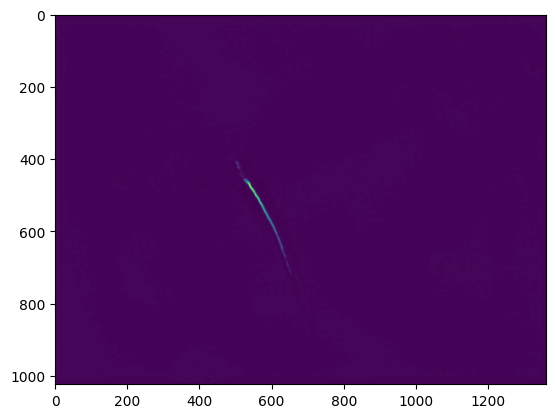

In [8]:
plt.imshow(pred)